# Rice Leafs 4 Classify Fasiai
<br/>
This noteboook refered to the following notebook.<br/>

'First Steps: Road to the Top, Part 1' by JEREMY HOWARD<br/>

https://www.kaggle.com/code/jhoward/first-steps-road-to-the-top-part-1

In [11]:
# install fastkaggle if not available
try: import fastkaggle
except ModuleNotFoundError:
    !pip install -Uq fastkaggle
from fastkaggle import *

## Set up

In [13]:
comp = 'riceleafs/RiceLeafs'
# path = setup_comp(comp, install='fastai "timm>=0.6.2.dev0"')
display(path)

NameError: name 'path' is not defined

In [14]:
from fastai.vision.all import * 
# set_seed(42)
# path.ls()

AttributeError: partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)

# Show the data

In [6]:
trn_path = path/'train'
files = get_image_files(trn_path)

(1324, 1324)


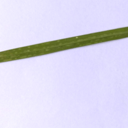

In [7]:
img = PILImage.create(files[0])
print(img.size)
img.to_thumb(128)

In [8]:
from fastcore.parallel import *
def f(o): return PILImage.create(o).size
sizes = parallel(f, files, n_workers=8)
pd.Series(sizes).value_counts()

(3120, 3120)    497
(2340, 2340)     25
(1881, 1881)     22
(1722, 1722)      7
(1903, 1903)      7
               ... 
(1939, 1939)      1
(2221, 2221)      1
(2576, 2576)      1
(2999, 2999)      1
(1967, 1967)      1
Name: count, Length: 1188, dtype: int64

# Train Data - ImageDataLoaders.from_folder

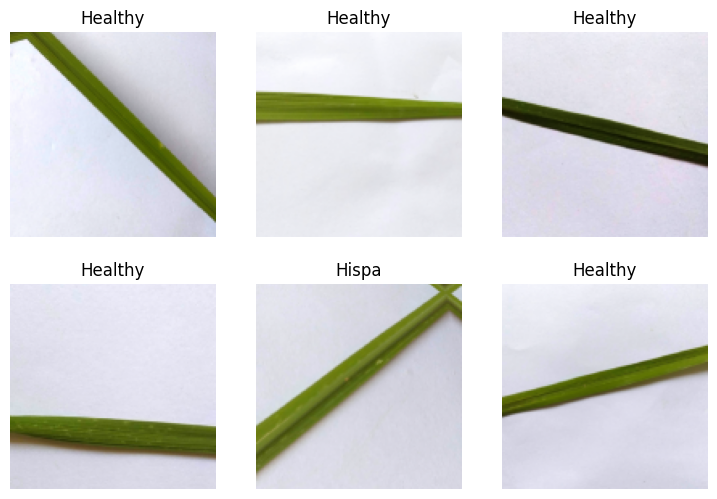

In [9]:
#### train and valid data in train folder
dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.2, seed=42,
    item_tfms=Resize(480, method='squish'),
    batch_tfms=aug_transforms(size=128, min_scale=0.75))
dls.show_batch(max_n=6)

#### train and valid folders separated
dls = ImageDataLoaders.from_folder(path, train='train', valid='val', seed=42,
    item_tfms=Resize(480, method='squish'),
    batch_tfms=aug_transforms(size=128, min_scale=0.75))
dls.show_batch(max_n=6)

# Model - 'resnet50d'

In [10]:
learn = vision_learner(dls, 'resnet50d', metrics=error_rate, path='.').to_fp16() #'resnet26d'

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth" to /home/hoangkss5/.cache/torch/hub/checkpoints/resnet50d_ra2-464e36ba.pth


SuggestedLRs(valley=0.001737800776027143, slide=0.0063095735386013985)

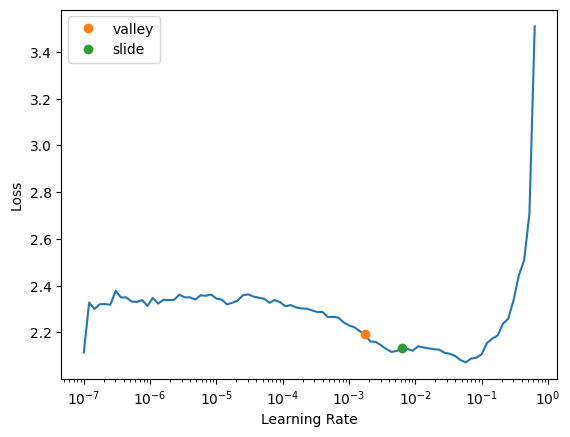

In [11]:
learn.lr_find(suggest_funcs=(valley, slide))

In [12]:
learn.fine_tune(30,0.01)

# Predict using Test Data

In [13]:
tst_files = get_image_files(path/'validation').sorted()
tst_dl = dls.test_dl(tst_files)
print(tst_files[0:3])

[Path('riceleafs/RiceLeafs/validation/BrownSpot/IMG_20190419_095712.jpg'), Path('riceleafs/RiceLeafs/validation/BrownSpot/IMG_20190419_095715.jpg'), Path('riceleafs/RiceLeafs/validation/BrownSpot/IMG_20190419_095726.jpg')]


In [14]:
probs,_,idxs = learn.get_preds(dl=tst_dl, with_decoded=True)

In [15]:
print(idxs)
print(dls.vocab)

tensor([1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3,
        3, 3, 1, 3, 0, 3, 3, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 1,
        2, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0,
        0, 0, 0, 3, 0, 1, 0, 1, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
        0, 0, 0, 3, 3, 3, 0, 3, 0, 1, 3, 3, 1, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3,
        1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 2, 1, 1, 1,
        1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3,
        1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 3,
        3, 3, 3, 1, 3, 0, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3,
        1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1,
        1, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 2, 3, 3, 1, 3, 1, 3, 3, 1, 3, 1,
        3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3, 1, 2, 1, 1, 1, 1, 1, 3, 3,
        1, 3, 1, 3, 3, 2, 3, 1, 1, 3, 1,

In [16]:
mapping = dict(enumerate(dls.vocab))
print(mapping)
reverse_mapping=dict(zip(dls.vocab,list(range(len(dls.vocab)))))
print(reverse_mapping)

{0: 'BrownSpot', 1: 'Healthy', 2: 'Hispa', 3: 'LeafBlast'}
{'BrownSpot': 0, 'Healthy': 1, 'Hispa': 2, 'LeafBlast': 3}


In [17]:
results = pd.Series(idxs.numpy(),name="idxs").map(mapping)
display(results)

0        Healthy
1        Healthy
2        Healthy
3        Healthy
4        Healthy
         ...    
666    LeafBlast
667    LeafBlast
668    LeafBlast
669    LeafBlast
670    LeafBlast
Name: idxs, Length: 671, dtype: object

In [18]:
testY=[]
for item in tst_files:
    testY+=[reverse_mapping[item.parent.name]]

In [19]:
from sklearn.metrics import classification_report
print(classification_report(testY,idxs,target_names=dls.vocab,digits=4))

              precision    recall  f1-score   support

   BrownSpot     0.1782    0.2952    0.2222       105
     Healthy     0.6327    0.4815    0.5468       297
       Hispa     0.0588    0.0088    0.0154       113
   LeafBlast     0.2047    0.3333    0.2537       156

    accuracy                         0.3383       671
   macro avg     0.2686    0.2797    0.2595       671
weighted avg     0.3654    0.3383    0.3384       671



#### classification_report

* 'resnet26d', learn.fine_tune(30,0.01), f1-score 0.3234 
* 'resnet26d', learn.fine_tune(60,0.01), f1-score 0.3025
* 'densenet201', learn.fine_tune(30,0.01), f1-score 0.2832
* 'tv_resnet101', learn.fine_tune(30,0.01), f1-score 0.2727
* 'efficientnet_b4', learn.fine_tune(30,0.01), f1-score 0.2250 
* 'mobilenetv2_140', learn.fine_tune(30,0.01), f1-score 0.1773
* 'resnet50d', learn.fine_tune(30,0.01), f1-score 

In [20]:
# save model
learn.export('riceleafs.pkl')

In [24]:
# save submission
sub = pd.DataFrame({'image_id': [o.name for o in tst_files], 'label': results})
sub.to_csv('submission.csv', index=False)

In [29]:
image_test = tst_files[1]
# predict class of image_test
pred_class,pred_idx,probs = learn.predict(image_test)
# print prediction and probability
print(pred_class, probs[pred_idx].item())


Healthy 0.7530876398086548


In [ ]:
# predict class of image_test